In [1]:
#https://docs.scipy.org/doc/scipy/reference/odr.html

#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
import sys

#MUSS NICHT ANGEPASST WERDEN
#Funktion welche den Fit durchführt 
def fit(x,y,x_err,y_err,beta0=[1., 0.]):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    def lin_func(B, x):
        [m,b]=B
        return m*x+b
    lin_model = Model(lin_func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, lin_model,beta0)
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#Muss nicth angepasst werden es sei denn die Ploteigenschaften sollen geädert werden
def zeichnen (x, y,x_err=np.nan,y_err=np.nan,label="", speichername="", xlabel="", ylabel="",fx_title="",x_title="", save=False,m_unit="",b_unit="",beta0=[1., 0.]):
    
    #Überprüft ob x&y die selbe Länge haben
    if not(len(x)==len(y)):
        sys.exit("Die Länge von x und y stimmen nicht überein")
    
    #Fit ereugen
    out = fit(x,y,x_err,y_err,beta0)
    
    #Überprüft welche Fehler angegeben wurden und ihre Länge
    if np.isnan(x_err).any():
        x_err=np.zeros_like(x)
    elif not(len(x)==len(x_err)):
        sys.exit("Die Länge von x und x_err stimmen nicht überein")
        
    if np.isnan(y_err).any():
        y_err=np.zeros_like(x)
    elif not(len(y)==len(y_err)):
        sys.exit("Die Länge von y und y_err stimmen nicht überein")
    
    
    #Plottet die Punkte und ihre Fehler
    plt.plot(x, y, "ok", label=label)
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, color="b", fmt='.', label="Fehler",capsize=5)
    
    #Plottet den Linearen Fit
    plt.plot(x, (out.beta[0]*x+out.beta[1]), color="k")
    
    #x,y label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #Legt den Titel fest, f(x) und x durch die jeweiligen Variabeln Austauschen
    plt.title((fx_title+" = ({:.4f}$\pm${:.4f})".format(out.beta[0],out.sd_beta[0])
               +m_unit+" $\cdot$ "+x_title+" + ({:.4f}$\pm${:.4f})".format(out.beta[1],out.sd_beta[1])+b_unit))
    
    #sonstiges
    plt.grid()
    plt.legend()
    
    #eventuelles Speichern
    if bool(save) == True:
        plt.savefig(speichername)
    
    #Darstellen der Plottes
    plt.show()
    
    #weitergeben der fit Eigenschaften
    return out
def bsp():
    #Beispielwerte für x,y und ihre Fehler, ersetzen in form von ... = np.array([0, 1, 2, 3, 4, 5])
    x = np.array([0, 1, 2, 3, 4, 5])
    y = np.array([i+3 + random.random() -0.5 for i in x])

    x_err = np.array([random.random() for i in x])
    y_err = np.array([random.random() for i in x])

    out=zeichnen (x=x, y=y, x_err=x_err,y_err=y_err, 
                  label="$x(y)$", #name der Punkte in der Legende
                  speichername="Plot_x(y)", 
                  xlabel="$x$", 
                  ylabel="$y$", 
                  fx_title="$f(x)$", #f(x) in dem titel
                  x_title="$x$", #x in dem titel
                  m_unit="$y/x$",
                  b_unit="$x$",
                  save=False) #speichert den Plot mit speichernamen ab

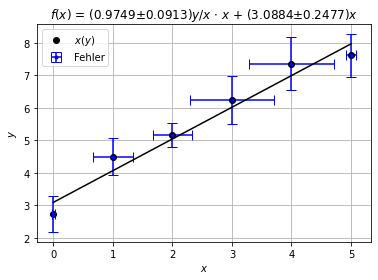

In [2]:
bsp()